# German real estate market listings

In [1]:
%load_ext nb_black

from matplotlib import pyplot as plt

%matplotlib inline
plt.rcParams["figure.figsize"] = (15, 10)

import pandas as pd

<IPython.core.display.Javascript object>

## 1) Data cleaning

###### load data:

In [2]:
filepath = "../data/kaufen2020-04-10.csv"
sale_df = pd.read_csv(filepath, sep=";", low_memory=False)
pd.set_option("display.max_columns", sale_df.shape[1])

<IPython.core.display.Javascript object>

In [3]:
sale_df

,timestamp,obj_regio1,obj_heatingType,ga_cd_via_qualified,obj_telekomTvOffer,obj_cId,obj_newlyConst,obj_balcony,obj_picture,obj_picturecount,obj_pricetrend,obj_telekomUploadSpeed,obj_telekomTrackingGroup,obj_telekomInternetTechnology,obj_yearConstructed,obj_telekomInternetType,obj_pricetrendbuy,obj_scoutId,obj_noParkSpaces,obj_firingTypes,obj_hasKitchen,obj_ExclusiveExpose,obj_telekomInternetProductName,obj_courtage,geo_bln,obj_cellar,obj_purchasePriceRange,obj_yearConstructedRange,obj_houseNumber,obj_energyType,obj_pricetrendrent,obj_livingSpace,geo_krs,obj_zipCode,obj_condition,obj_interiorQual,ga_cd_cxp_historicallisting,obj_telekomDownloadSpeed,obj_parkingSpace,obj_street,obj_lift,obj_telekomInternetUrlMobile,obj_telekomInternetUrl,obj_streetPlain,obj_typeOfFlat,geo_plz,obj_noRooms,obj_thermalChar,obj_assistedLiving,obj_lastRefurbish,obj_ityp,obj_telekomHdTelephone,geo_land,ga_cd_via,obj_telekomInternet,obj_immotype,obj_rented,obj_floor,obj_telekomInternetServices,obj_telekomInternetProductAvailable,obj_cwId,obj_purchasePrice,ga_cd_application_requirements,obj_numberOfFloors,obj_noRoomsRange,ga_cd_maillead_default_shown,obj_garden,evt_count_pm_sig,obj_barrierFree,obj_international,obj_regio3,obj_objectnumber,obj_livingSpaceRange,obj_regio2,obj_usableArea,obj_rentSubsidy,obj_groupnumber,ga_cd_developer_virtualreality,obj_galleryAd,obj_energyEfficiencyClass,obj_project_id,obj_nbp,obj_telekomHybridUploadSpeed,obj_telekomHybridDownloadSpeed,ga_cd_customer_group
0,2020-04-10 01:00:02.331477,Sachsen,central_heating,True,ONE_YEAR_FREE,378460,n,y,https://pictures.immobilienscout24.de/listings...,5,6.86,40 MBit/s,telekom_layer_magenta_l,über VDSL,1954.0,REGULAR,6.86,116606933,1.0,gas,n,False,MagentaZuhause L,y,Sachsen,n,2,2.0,no_information,energy_consumption,0.18,48.55,Chemnitz,9117,well_kept,no_information,False,100 MBit/s,outside,no_information,n,https://padlock.link/ioml,https://padlock.link/ml,no_information,apartment,9117,2.0,106.9,n,1998.0,"2,active",True,Deutschland,schaufenster,100 MBit/s,wohnung_kauf,y,2.0,"web,email,bank,music,dl-ul,game,sd,mltstr,hd,f...",True,001.378460,65000.0,profile0,4.0,2,True,n,showqualicontactform,n,n,Reichenbrand,10075,2,Chemnitz,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-04-10 01:00:02.592363,Berlin,central_heating,True,ONE_YEAR_FREE,17476763,n,y,https://pictures.immobilienscout24.de/listings...,10,16.53,40 MBit/s,telekom_layer_magenta_l,über VDSL,1960.0,REGULAR,16.53,117019759,NaN,gas,y,False,MagentaZuhause L,y,Berlin,n,5,2.0,no_information,energy_consumption,9.26,49.00,Berlin,12045,well_kept,no_information,False,100 MBit/s,no_information,no_information,n,https://padlock.link/ioml,https://padlock.link/ml,no_information,apartment,12045,2.0,115.0,n,NaN,"2,active",True,Deutschland,schaufenster,100 MBit/s,wohnung_kauf,n,1.0,"web,email,bank,music,dl-ul,game,sd,mltstr,hd,f...",True,009.2f31766d-95e4-4ffa-a307-2f0bd139b84e,249000.0,profile0,5.0,2,True,n,showqualicontactform,n,n,Neukölln_Neukölln,117019759,2,Berlin,4.0,220.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2020-04-10 01:00:02.827618,Berlin,district_heating,True,ONE_YEAR_FREE,8874474,n,n,https://pictures.immobilienscout24.de/listings...,16,11.12,40 MBit/s,telekom_layer_magenta_l,über VDSL,1920.0,REGULAR,11.12,116958591,NaN,district_heating,y,False,MagentaZuhause L,y,Berlin,y,8,1.0,no_information,energy_consumption,6.13,73.42,Berlin,10629,fully_renovated,no_information,False,100 MBit/s,no_information,no_information,n,https://padlock.link/ioml,https://padlock.link/ml,no_information,ground_floor,10629,3.0,140.4,n,2019.0,"2,active",True,Deutschland,schaufenster,100 MBit/s,wohnung_kauf,n,NaN,"web,email,bank,music,dl-ul,game,sd,mltstr,hd,f...",True,001.8874474,495000.0,profile0,NaN,3,True,n,NaN,n,n,Charlottenburg_Charlottenburg,KE-KN-18-06,3,Berlin,NaN,261.0,NaN,True,disabled,E,NaN,NaN,NaN,NaN,NaN
3,2020-04-10 01:00:03.062418,Bayern,floor_heating,True,ONE_YEAR_FREE,16706576,n,y,https://pictures.immobilienscout24.de/listings...,12,6.54,40 MBit/s

<IPython.core.display.Javascript object>

In [4]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35794 entries, 0 to 35793
Data columns (total 85 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   timestamp                            35794 non-null  object 
 1   obj_regio1                           35794 non-null  object 
 2   obj_heatingType                      31241 non-null  object 
 3   ga_cd_via_qualified                  2882 non-null   object 
 4   obj_telekomTvOffer                   30153 non-null  object 
 5   obj_cId                              35794 non-null  int64  
 6   obj_newlyConst                       35794 non-null  object 
 7   obj_balcony                          35794 non-null  object 
 8   obj_picture                          35648 non-null  object 
 9   obj_picturecount                     35794 non-null  int64  
 10  obj_pricetrend                       35285 non-null  float64
 11  obj_telekomUploadSpeed      

<IPython.core.display.Javascript object>

###### remove duplicates:

In [5]:
sale_df = sale_df.drop_duplicates(subset="obj_scoutId")

<IPython.core.display.Javascript object>

###### remove columns with missing values:

In [6]:
sale_df = sale_df[sale_df.columns[~sale_df.isnull().any()]]

<IPython.core.display.Javascript object>

###### show cleaned data:

In [7]:
sale_df

,timestamp,obj_regio1,obj_cId,obj_newlyConst,obj_balcony,obj_picturecount,obj_scoutId,obj_hasKitchen,geo_bln,obj_cellar,obj_purchasePriceRange,obj_houseNumber,obj_livingSpace,geo_krs,obj_zipCode,obj_condition,obj_interiorQual,ga_cd_cxp_historicallisting,obj_parkingSpace,obj_street,obj_lift,obj_streetPlain,obj_typeOfFlat,geo_plz,obj_noRooms,obj_assistedLiving,obj_ityp,geo_land,ga_cd_via,obj_immotype,obj_rented,obj_cwId,obj_purchasePrice,ga_cd_application_requirements,obj_noRoomsRange,ga_cd_maillead_default_shown,obj_garden,obj_barrierFree,obj_international,obj_regio3,obj_objectnumber,obj_livingSpaceRange,obj_regio2
0,2020-04-10 01:00:02.331477,Sachsen,378460,n,y,5,116606933,n,Sachsen,n,2,no_information,48.55,Chemnitz,9117,well_kept,no_information,False,outside,no_information,n,no_information,apartment,9117,2.0,n,"2,active",Deutschland,schaufenster,wohnung_kauf,y,001.378460,65000.0,profile0,2,True,n,n,n,Reichenbrand,10075,2,Chemnitz
1,2020-04-10 01:00:02.592363,Berlin,17476763,n,y,10,117019759,y,Berlin,n,5,no_information,49.00,Berlin,12045,well_kept,no_information,False,no_information,no_information,n,no_information,apartment,12045,2.0,n,"2,active",Deutschland,schaufenster,wohnung_kauf,n,009.2f31766d-95e4-4ffa-a307-2f0bd139b84e,249000.0,profile0,2,True,n,n,n,Neukölln_Neukölln,117019759,2,Berlin
2,2020-04-10 01:00:02.827618,Berlin,8874474,n,n,16,116958591,y,Berlin,y,8,no_information,73.42,Berlin,10629,fully_renovated,no_information,False,no_information,no_information,n,no_information,ground_floor,10629,3.0,n,"2,active",Deutschland,schaufenster,wohnung_kauf,n,001.8874474,495000.0,profile0,3,True,n,n,n,Charlottenburg_Charlottenburg,KE-KN-18-06,3,Berlin
3,2020-04-10 01:00:03.062418,Bayern,16706576,n,y,12,117149092,y,Bayern,y,9,3,104.00,Ebersberg_Kreis,85591,mint_condition,sophisticated,False,underground_garage,Heinrich-Laberger-Ring,n,Heinrich-Laberger-Ring,ground_floor,85591,4.0,n,"2,active",Deutschland,schaufenster,wohnung_kauf,n,009.f3e081ef-eb98-4cbd-90c3-7b96d7eadca3,729000.0,profile0,4,True,y,y,n,Vaterstetten,117149092,5,Ebersberg_Kreis
4,2020-04-10 01:00:03.334003,Bayern,15577785,y,n,1,114850421,n,Bayern,n,10,11,88.31,München,81373,no_information,no_information,False,no_information,Ortlerstr.,n,Ortlerstr.,apartment,81373,3.0,n,"2,active",Deutschland,schaufenster,wohnung_kauf,n,001.15587907,868000.0,profile0,3,True,n,n,n,Sendling_Westpark,238,4,München
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35789,2020-04-10 05:07:59.011884,Hessen,4623072,n,y,8,46087769,y,Hessen,y,5,5c,77.00,Main_Kinzig_Kreis,63543,fully_renovated,sophisticated,False,outside,R&ouml;merstr.,n,Römerstr.,roof_storey,63543,3.0,n,"2,active",Deutschland,standard,wohnung_kauf,y,001.4623072,215000.0,profile0,3,True,y,n,n,Neuberg,46087769,3,Main_Kinzig_Kreis
35790,2020-04-10 05:07:59.464411,Nordrhein_Westfalen,4183744,n,y,9,45416272,n,Nordrhein_Westfalen,y,6,23,91.00,Köln,50769,first_time_use_after_refurbishment,sophisticated,False,garage,Deeler Weg,n,Deeler_Weg,maisonette,50769,3.0,n,"2,active",Deutschland,standard,wohnung_kauf,n,001.4183744,267500.0,profile0,3,True,y,n,n,Worringen,45416272,4,Köln
35791,2020-04-10 05:07:59.894297,Thüringen,5320130,n,y,9,47106331,y,Thüringen,n,2,6,62.00,Ilm_Kreis,98708,modernized,sophisticated,False,garage,Junge Gemeinde,n,Junge_Gemeinde,ground_floor,98708,2.0,n,"2,active",Deutschland,standard,wohnung_kauf,n,001.5320130,79000.0,profile0,2,True,y,y,n,Möhrenbach,47106331,3,Ilm_Kreis
35792,2020-04-10 05:08:00.449503,Baden_Württemberg,3659750,n,y,17,44807738,y,Baden_Württemberg,n,5,no_information,76.00,Schwäbisch_Hall_Kreis,74423,well_kept,sophisticated,False,garage,no_information,n,no_information,maisonette,74423,3.0,n,"2,active",Deutschland,standard,wohnung_kauf,n,001.3659750,226200.0,profile0,3,True,y,n,n,Obersontheim,44807738,3,Schwäbisch_Hall_Kreis


<IPython.core.display.Javascript object>

In [8]:
sale_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35766 entries, 0 to 35793
Data columns (total 43 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   timestamp                       35766 non-null  object 
 1   obj_regio1                      35766 non-null  object 
 2   obj_cId                         35766 non-null  int64  
 3   obj_newlyConst                  35766 non-null  object 
 4   obj_balcony                     35766 non-null  object 
 5   obj_picturecount                35766 non-null  int64  
 6   obj_scoutId                     35766 non-null  int64  
 7   obj_hasKitchen                  35766 non-null  object 
 8   geo_bln                         35766 non-null  object 
 9   obj_cellar                      35766 non-null  object 
 10  obj_purchasePriceRange          35766 non-null  int64  
 11  obj_houseNumber                 35766 non-null  object 
 12  obj_livingSpace                 

<IPython.core.display.Javascript object>

## 2) Feature engineering

###### select features:

In [9]:
select_columns = [
    "obj_scoutId",
    "obj_purchasePrice",
    "obj_livingSpace",
    "obj_noRooms",
    "obj_zipCode",
    "obj_regio1",
    "obj_regio2",
    "obj_regio3",
]
sale_select_df = sale_df[select_columns].copy()

<IPython.core.display.Javascript object>

###### add features:

In [10]:
sale_select_df["saleprice_per_m2"] = (
    sale_select_df["obj_purchasePrice"] / sale_select_df["obj_livingSpace"]
)

<IPython.core.display.Javascript object>

In [11]:
sale_select_df

,obj_scoutId,obj_purchasePrice,obj_livingSpace,obj_noRooms,obj_zipCode,obj_regio1,obj_regio2,obj_regio3,saleprice_per_m2
0,116606933,65000.0,48.55,2.0,9117,Sachsen,Chemnitz,Reichenbrand,1338.825953
1,117019759,249000.0,49.00,2.0,12045,Berlin,Berlin,Neukölln_Neukölln,5081.632653
2,116958591,495000.0,73.42,3.0,10629,Berlin,Berlin,Charlottenburg_Charlottenburg,6742.032144
3,117149092,729000.0,104.00,4.0,85591,Bayern,Ebersberg_Kreis,Vaterstetten,7009.615385
4,114850421,868000.0,88.31,3.0,81373,Bayern,München,Sendling_Westpark,9829.011437
...,...,...,...,...,...,...,...,...,...
35789,46087769,215000.0,77.00,3.0,63543,Hessen,Main_Kinzig_Kreis,Neuberg,2792.207792
35790,45416272,267500.0,91.00,3.0,50769,Nordrhein_Westfalen,Köln,Worringen,2939.560440
35791,47106331,79000.0,62.00,2.0,98708,Thüringen,Ilm_Kreis,Möhrenbach,1274.193548
35792,44807738,226200.0,76.00,3.0,74423,Baden_Württemberg,Schwäbisch_Hall_Kreis,Obersontheim,2976.315789


<IPython.core.display.Javascript object>

###### sort zipCodes by feature:

In [12]:
min_count = 3
aggregate = "median"
feature = "saleprice_per_m2"

zip_group = sale_select_df.groupby("obj_zipCode")
filt = zip_group[feature].agg([aggregate, "count"])["count"] >= min_count
saleprices_zip_df = (
    zip_group[feature]
    .agg([aggregate, "count"])[filt]
    .sort_values(by=aggregate, ascending=False)
)

<IPython.core.display.Javascript object>

## 3) Results

In [13]:
saleprices_zip_df

,median,count
obj_zipCode,,
80539,22134.146341,6
80333,17201.623317,14
81679,16939.655172,13
80801,16173.913043,3
80469,14992.433796,20
...,...,...
99996,172.494904,5
94253,164.179825,6
7973,155.367232,3


<IPython.core.display.Javascript object>

In [16]:
sale_filt_col = "obj_zipCode"
sale_filt_arg = 12489

sale_filt = sale_select_df[sale_filt_col] == sale_filt_arg
sale_select_df[sale_filt]

,obj_scoutId,obj_purchasePrice,obj_livingSpace,obj_noRooms,obj_zipCode,obj_regio1,obj_regio2,obj_regio3,saleprice_per_m2
205,116023051,176500.0,29.14,1.0,12489,Berlin,Berlin,Adlershof_Treptow,6056.966369
207,116023048,139950.0,24.07,1.0,12489,Berlin,Berlin,Adlershof_Treptow,5814.291649
454,114934358,367000.0,64.69,3.0,12489,Berlin,Berlin,Adlershof_Treptow,5673.210697
457,114934221,379000.0,64.69,3.0,12489,Berlin,Berlin,Adlershof_Treptow,5858.710774
1699,116924411,265000.0,78.33,3.0,12489,Berlin,Berlin,Adlershof_Treptow,3383.122686
1875,113564857,213000.0,68.17,3.0,12489,Berlin,Berlin,Adlershof_Treptow,3124.541587
10096,117100231,407946.0,70.64,3.0,12489,Berlin,Berlin,Adlershof_Treptow,5775.000000
10104,117099907,518578.0,96.84,4.0,12489,Berlin,Berlin,Adlershof_Treptow,5354.997935
19564,114954791,130500.0,43.50,2.0,12489,Berlin,Berlin,Adlershof_Treptow,3000.000000
19565,114960018,170000.0,71.75,3.0,12489,Berlin,Berlin,Adlershof_Treptow,2369.337979


<IPython.core.display.Javascript object>

###### number of listings with feature:

Text(0, 0.5, 'number of listings')

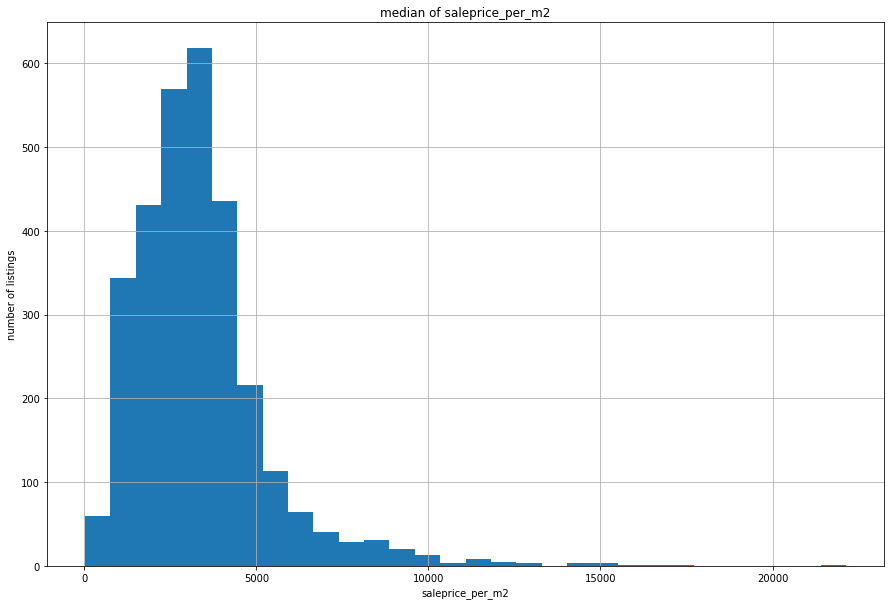

<IPython.core.display.Javascript object>

In [15]:
saleprices_zip_df.hist(column=aggregate, bins=30)
plt.title(aggregate + " of " + feature)
plt.xlabel(feature)
plt.ylabel("number of listings")